<a href="https://colab.research.google.com/github/Nithyashriramkumar/twitter_sentimental_analysis/blob/main/twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#<font face="Trebuchet MS" size="6">"Twitter Sentiment Analysis"<font color="#999" size="4">&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;</font><font color="#999" size="4">NithyaShri</font><font color="#999" size="4">&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;</font><a href="https://github.com/Nithyashriramkumar" target="_blank"><font color="#999" size="4">Github</font></a>
# Mini-Project

In [ ]:
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install langdetect

In [ ]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
consumerKey = ""
consumerSecret = ""
accessToken = ""
accessTokenSecret = ""
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [ ]:
nltk.downloader.download('vader_lexicon')

In [ ]:
def percentage(part,whole):
 return 100 * float(part)/float(whole)
keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))
tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
  tweet_list.append(tweet.text)
  analysis = TextBlob(tweet.text)
  score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  polarity += analysis.sentiment.polarity
  if neg > pos:
    negative_list.append(tweet.text)
    negative += 1
  elif pos > neg:
    positive_list.append(tweet.text)
    positive += 1
  elif pos == neg:
    neutral_list.append(tweet.text)
    neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [ ]:
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  1024
positive number:  281
negative number:  61
neutral number:  682


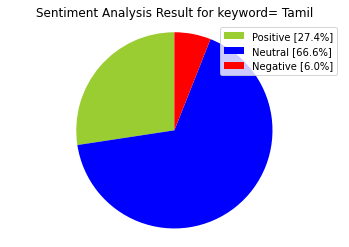

In [ ]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"" )
plt.axis('equal')
plt.show()

In [ ]:
tweet_list.drop_duplicates(inplace = True)

In [ ]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: ',"",x)
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|([°\-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @MadrasTalkies_: Listen to ALL #PonniyinSel...,# ( ) ...
1,RT @mkstalin: I hope Thiru @ArvindKejriwal enj...,...
3,RT @AaronMathewINC: Rahul Gandhi reached Tamil...,. ...
6,RT @LycaProductions: The Grand audio and trail...,# 1 ...
7,"RT @XpressCinema: ""I play a small character in...",""" . ..."
8,RT @AaronMathewINC: Rahul Gandhi will start hi...,"3,500 ..."
9,RT @ayushmehrotra_: This video is viral in Tam...,🔥🔥\n ://...
10,RT @IndusFederalist: We saw this in Maharashtr...,", ..."
14,RT @thusi_c: Top-five Tamil personalities disc...,:\n\n# ...
18,RT @Anuraag_Shukla: ~ MS Subbulakshmi in the T...,~ (1 ...


In [ ]:
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
  score = SentimentIntensityAnalyzer().polarity_scores(row)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  if neg > pos:
    tw_list.loc[index, 'sentiment'] = "negative"
  elif pos > neg:
    tw_list.loc[index, 'sentiment'] = "positive"
  else:
    tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @MadrasTalkies_: Listen to ALL #PonniyinSel...,# ( ) ...,0.0,0.0,neutral,0.0,0.0,0.0,0.0
1,RT @mkstalin: I hope Thiru @ArvindKejriwal enj...,...,0.0,0.0,neutral,0.0,0.0,0.0,0.0
3,RT @AaronMathewINC: Rahul Gandhi reached Tamil...,. ...,0.0,0.0,neutral,0.0,0.0,0.0,0.0
6,RT @LycaProductions: The Grand audio and trail...,# 1 ...,0.0,0.0,neutral,0.0,0.0,0.0,0.0
7,"RT @XpressCinema: ""I play a small character in...",""" . ...",0.0,0.0,neutral,0.0,0.0,0.0,0.0
8,RT @AaronMathewINC: Rahul Gandhi will start hi...,"3,500 ...",0.0,0.0,neutral,0.0,1.0,0.0,0.0
9,RT @ayushmehrotra_: This video is viral in Tam...,🔥🔥\n ://...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
10,RT @IndusFederalist: We saw this in Maharashtr...,", ...",0.0,0.0,neutral,0.0,0.0,0.0,0.0
14,RT @thusi_c: Top-five Tamil personalities disc...,:\n\n# ...,0.0,0.0,neutral,0.0,0.0,0.0,0.0
18,RT @Anuraag_Shukla: ~ MS Subbulakshmi in the T...,~ (1 ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0


In [ ]:
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,422,99.76
negative,1,0.24


In [ ]:
"""pichart = count_values_in_column(tw_list,'sentiment')
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
def create_wordcloud(text):
  mask = np.array(Image.open('/content/s/cloud.png'))
  stopwords = set(STOPWORDS)
  wc = WordCloud(background_color='white',
  mask = mask,
  max_words=3000,
  stopwords=stopwords,
  repeat=True)
  wc.generate(str(text))
  wc.to_file('/content/s/wc.png')
  print('word Cloud Saved Successfully')
  path='/content/s/wc.png'
  display(Image.open(path))

In [ ]:
create_wordcloud(tw_list['text'].values)

FileNotFoundError: ignored

In [ ]:
create_wordcloud(tw_list_positive['text'].values)

FileNotFoundError: ignored

In [ ]:
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,140.0
neutral,106.0


In [ ]:
round(pd.DataFrame(tw_list.groupby('sentiment').text_word_count.mean()),2)

,text_word_count
sentiment,
negative,7.00
neutral,8.06


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Removing Punctuation
def remove_punct(text):
 text = "".join([char for char in text if char not in string.punctuation])
 text = re.sub('[0–9]+','', text)
 return text
tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
tw_list.head()

In [ ]:
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
print(countVectorizer.get_feature_names())

count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

75 Number of reviews has 51 words
['', 'ß', 'ã', 'ä', 'ö', 'ü', 'ซ', 'ด', 'ทธ', 'น', 'บของแถมเพ', 'บส', 'พร', 'มเป', 'มได', 'ร', 'ว', 'วยท', 'องแล', 'อจอเพ', 'อมร', 'อเคร', 'เศษ', 'ในราคาพ', '①', '②', '③', '④', '⑤', '⑥', 'お前昨日俺が寝落ちしたからってへこたれんなよ', 'せめて家に着くまで頑張れよ', 'そしたら充電してやるから', 'って苦情が来て一方的に切られた', 'と', 'を名様にプレゼントします', 'を試用して遊ぶので是非見にきてね', 'エペプロミニワイヤレス', 'スカフインパクト', 'デバイスプレゼント企画', 'プレゼント', 'プレゼント企画第弾', 'マイク', 'モニタ', 'ロジクール', 'ワイヤレスイヤホンから', '下の賞品の中から抽選で名様に人個', '今回は', '当アカウントのフォローとリツイート', '応募方法', '月日時から配信にて']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,ß,ã,ä,ö,ü,ซ,ด,ทธ,น,...,プレゼント企画第弾,マイク,モニタ,ロジクール,ワイヤレスイヤホンから,下の賞品の中から抽選で名様に人個,今回は,当アカウントのフォローとリツイート,応募方法,月日時から配信にて
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,1,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
ß,2
ö,2
ü,2
ซ,2
น,2
デバイスプレゼント企画,1
お前昨日俺が寝落ちしたからってへこたれんなよ,1
せめて家に着くまで頑張れよ,1
そしたら充電してやるから,1
って苦情が来て一方的に切られた,1


In [ ]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
 vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
 bag_of_words = vec.transform(corpus)
 sum_words = bag_of_words.sum(axis=0) 
 words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
 words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
 return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)
n2_bigrams

[('プレゼント企画第3弾 下の賞品の中から抽選で2名様に1人2個', 1),
 ('下の賞品の中から抽選で2名様に1人2個 プレゼント', 1),
 ('プレゼント 240', 1),
 ('240 モニタ', 1),
 ('モニタ スカフインパクト', 1),
 ('スカフインパクト エペプロミニワイヤレス', 1),
 ('エペプロミニワイヤレス 733', 1),
 ('733 マイク', 1),
 ('83 5354', 1),
 ('___ ___', 1),
 ('___ 88', 1),
 ('88 2015', 1),
 ('ワイヤレスイヤホンから って苦情が来て一方的に切られた', 1),
 ('って苦情が来て一方的に切られた お前昨日俺が寝落ちしたからってへこたれんなよ', 1),
 ('お前昨日俺が寝落ちしたからってへこたれんなよ せめて家に着くまで頑張れよ', 1),
 ('せめて家に着くまで頑張れよ そしたら充電してやるから', 1),
 ('131 78', 1),
 ('ロジクール デバイスプレゼント企画', 1),
 ('デバイスプレゼント企画 今回は', 1),
 ('今回は 335', 1)]

In [ ]:
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)
n3_trigrams

[('プレゼント企画第3弾 下の賞品の中から抽選で2名様に1人2個 プレゼント', 1),
 ('下の賞品の中から抽選で2名様に1人2個 プレゼント 240', 1),
 ('プレゼント 240 モニタ', 1),
 ('240 モニタ スカフインパクト', 1),
 ('モニタ スカフインパクト エペプロミニワイヤレス', 1),
 ('スカフインパクト エペプロミニワイヤレス 733', 1),
 ('エペプロミニワイヤレス 733 マイク', 1),
 ('___ ___ 88', 1),
 ('___ 88 2015', 1),
 ('ワイヤレスイヤホンから って苦情が来て一方的に切られた お前昨日俺が寝落ちしたからってへこたれんなよ', 1),
 ('って苦情が来て一方的に切られた お前昨日俺が寝落ちしたからってへこたれんなよ せめて家に着くまで頑張れよ', 1),
 ('お前昨日俺が寝落ちしたからってへこたれんなよ せめて家に着くまで頑張れよ そしたら充電してやるから', 1),
 ('ロジクール デバイスプレゼント企画 今回は', 1),
 ('デバイスプレゼント企画 今回は 335', 1),
 ('今回は 335 を1名様にプレゼントします', 1),
 ('335 を1名様にプレゼントします 応募方法', 1),
 ('を1名様にプレゼントします 応募方法 当アカウントのフォローとリツイート', 1),
 ('応募方法 当アカウントのフォローとリツイート 月3日21時から配信にて', 1),
 ('当アカウントのフォローとリツイート 月3日21時から配信にて 335', 1),
 ('月3日21時から配信にて 335 413', 1)]